## importing necessary packages

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns

## concating train and test data 

In [63]:

train_dataSet = pd.read_csv('./data/train.csv')
test_dataSet = pd.read_csv('./data/test.csv') 
whole_dataSet = pd.concat([train_dataSet, test_dataSet])
whole_dataSet

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,NaN
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,NaN
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,NaN
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,NaN


## dropping na's and unnecessary features and modifing some columns

In [64]:
whole_dataSet.replace('NaN ' , np.nan , inplace=True) # some values are NaN string with extra space 
# i replaced them with real nan value and then droped them 

In [65]:
whole_dataSet.dropna(inplace=True)
whole_dataSet.drop(columns=['ID','Delivery_person_ID'] , axis=1 , inplace=True)

### converting time_taken to integer values

In [66]:
whole_dataSet['Time_taken(min)'] =whole_dataSet['Time_taken(min)'].apply(lambda x : int(x.replace('(min)', ''))) 

### modifying data set columns 

In [67]:
whole_dataSet['Time_Orderd'] = whole_dataSet['Time_Orderd'].apply(lambda x: pd.to_datetime(x).time())
whole_dataSet['Time_Order_picked'] = whole_dataSet['Time_Order_picked'].apply(lambda x:pd.to_datetime(x).time())


### in this case after i converted strings to pandas time , i create time periods to see how orders and other featuers has collaboration with time periods 

In [68]:
bins = [
    pd.to_datetime('00:00').time(), 
    pd.to_datetime('04:00').time(),
    pd.to_datetime('07:00').time(), 
    pd.to_datetime('10:00').time(), 
    pd.to_datetime('13:00').time(), 
    pd.to_datetime('16:00').time(), 
    pd.to_datetime('19:00').time(),
    pd.to_datetime('22:00').time(),
    pd.to_datetime('23:59').time()
]
labels = ['00:00-04:00', '04:00-07:00', '07:00-10:00', '10:00-13:00', 
          '13:00-16:00', '16:00-19:00', '19:00-22:00', '22:00-00:00']
def assign_time_period(time): 
    for i in range(len(bins) - 1): 
        if bins[i] <= time < bins[i+1]: 
            return labels[i]
whole_dataSet['time_periods']= whole_dataSet['Time_Orderd'].apply(assign_time_period)

### removing extra spaces from som columns

In [69]:
whole_dataSet['Road_traffic_density'] =whole_dataSet['Road_traffic_density'].apply(lambda x:x.strip())

## saving clean data

In [70]:
whole_dataSet.to_csv('./data/clean_data.csv')

In [71]:
whole_dataSet

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time_periods
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,10:00-13:00
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,19:00-22:00
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,07:00-10:00
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,16:00-19:00
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,13:00-16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,10:00-13:00
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,19:00-22:00
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,22:00-00:00
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,13:00-16:00


In [72]:
weather_filter = whole_dataSet[['Weatherconditions' , 'Time_taken(min)']]

In [73]:
weather_group = weather_filter.groupby('Weatherconditions')
mean_time_by_condition = weather_filter.groupby('Weatherconditions')['Time_taken(min)'].mean().round(2)

In [74]:
mean_weather_df = pd.DataFrame(mean_time_by_condition).reset_index()
mean_weather_df['total_orders']=  whole_dataSet['Weatherconditions'].value_counts().values
#Removed repetitive wording for enhanced readability and professionalism
mean_weather_df['Weatherconditions']  = mean_weather_df['Weatherconditions'].apply(lambda x : x.replace('conditions' , '').strip())
mean_weather_df.to_csv('./data/visualizations_df/weather_timeTaken.csv' , index=False)


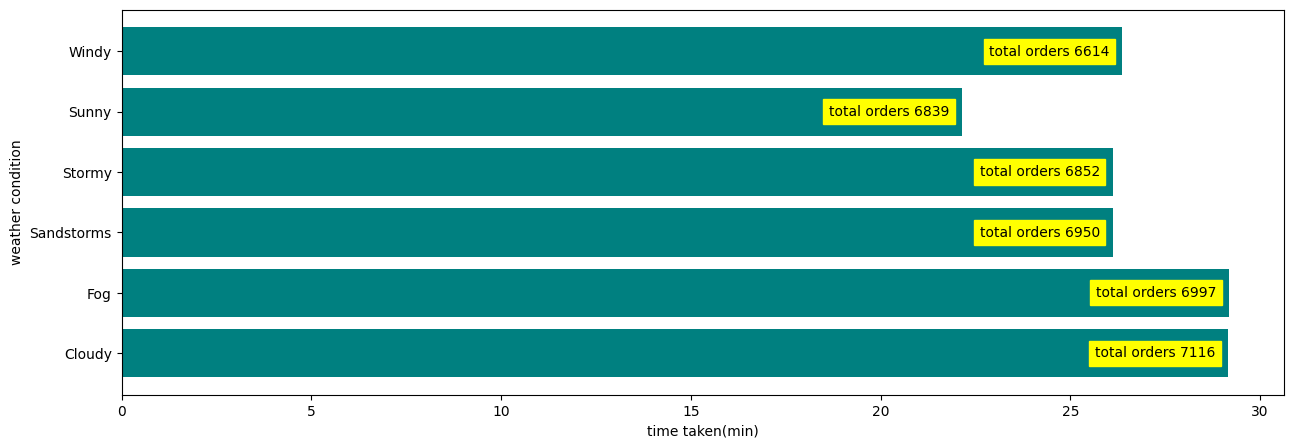

In [75]:
fig , ax = plt.subplots(figsize=(15,5))
bars = ax.barh(mean_weather_df['Weatherconditions'], mean_weather_df['Time_taken(min)'] , color='teal')
ax.set_xlabel('time taken(min)')
ax.set_ylabel('weather condition')
for bar, count in zip(bars, mean_weather_df['total_orders']):
    ax.text(bar.get_width()-3.5, bar.get_y() + bar.get_height()/2, 
            f'total orders {count}', 
            va='center', ha='left', color='black', fontsize=10 , bbox=dict(facecolor='yellow', edgecolor='yellow'))

## preparing data for traffic analysis

In [76]:
traffic = whole_dataSet[['Road_traffic_density' ,'Time_taken(min)' , 'Type_of_vehicle' ,'Time_Orderd' , 'time_periods']]
traffic.to_csv('./data/visualizations_df/traffic.csv', index=False)

Text(0, 0.5, 'time_taken')

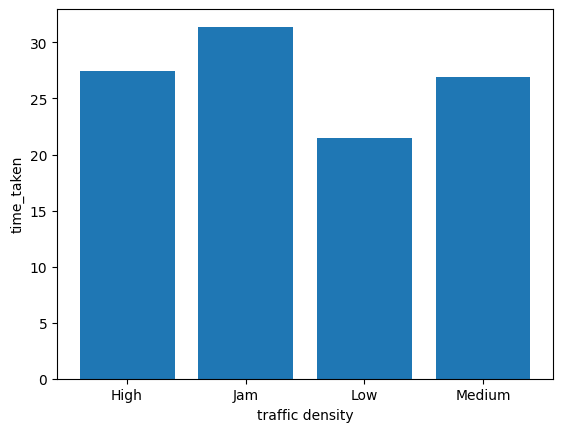

In [77]:
mean_traffic_df = traffic.groupby('Road_traffic_density')['Time_taken(min)'].mean().round(2)
mean_traffic_df = pd.DataFrame(mean_traffic_df).reset_index()
mean_traffic_df.to_csv('./data/visualizations_df/mean_traffic_df.csv' , index=False)
fig ,axes = plt.subplots()
axes.bar(mean_traffic_df['Road_traffic_density'] , mean_traffic_df['Time_taken(min)'])
axes.set_xlabel('traffic density')
axes.set_ylabel("time_taken")

<Axes: xlabel='Type_of_vehicle', ylabel='Road_traffic_density'>

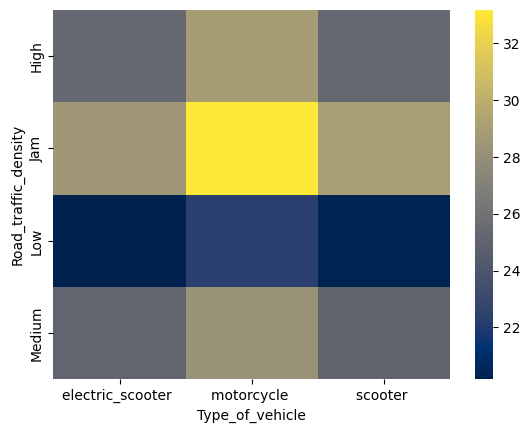

In [78]:
heatmap_data = traffic.pivot_table(values='Time_taken(min)' , index='Road_traffic_density', columns='Type_of_vehicle')
sns.heatmap(heatmap_data, cmap='cividis') 

### time effect on traffic 

In [79]:
traffic_group_df = pd.DataFrame(traffic.groupby('time_periods')['Road_traffic_density'].agg(lambda x :x.mode()[0])).reset_index()## the zero here is to make sure 
# if we have same amount of frequency in one value instead of list just return the first one 
traffic_group_df.to_csv("./data/visualizations_df/time_traffic.csv")
traffic_group_df

,time_periods,Road_traffic_density
0,00:00-04:00,Low
1,07:00-10:00,Low
2,10:00-13:00,High
3,13:00-16:00,High
4,16:00-19:00,Medium
5,19:00-22:00,Jam
6,22:00-00:00,Low


### traffic scatter visualization

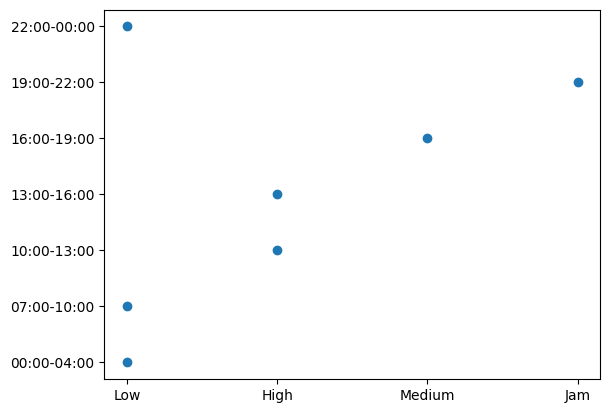

In [80]:
order = ['Low' , "Medium", "High" , "Jam"] 
traffic_group_df['Road_traffic_density'] = pd.Categorical(traffic_group_df['Road_traffic_density'], categories=order ,ordered=True )
fig , axes = plt.subplots() 
axes.scatter(traffic_group_df['Road_traffic_density'], traffic_group_df['time_periods'])

### traffic heatmap visualization

,time_periods,Road_traffic_density
0,00:00-04:00,Low
1,07:00-10:00,Low
2,10:00-13:00,High
3,13:00-16:00,High
4,16:00-19:00,Medium
5,19:00-22:00,Jam
6,22:00-00:00,Low


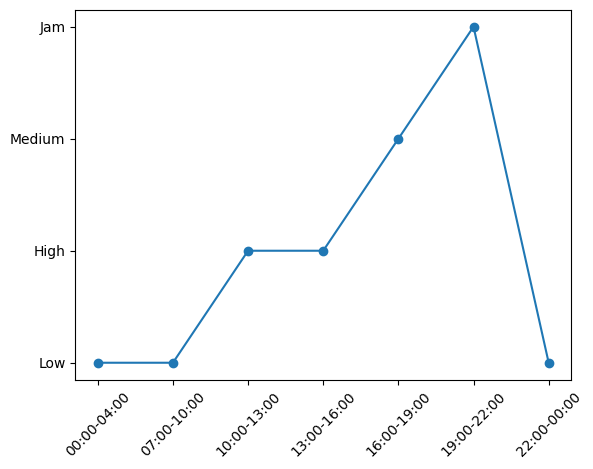

In [81]:
fig , axes = plt.subplots() 
axes.plot(traffic_group_df['time_periods'] , traffic_group_df['Road_traffic_density'] , marker="o")
plt.xticks(rotation=45);
traffic_group_df

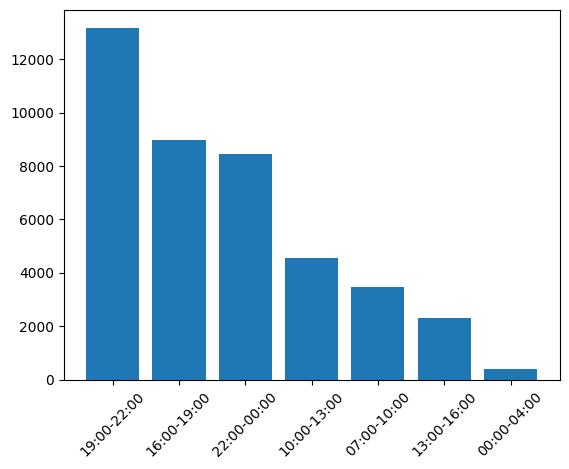

In [82]:
fig , axes  = plt.subplots() 
axes.bar(traffic['time_periods'].value_counts().index  , traffic['time_periods'].value_counts().values)
plt.xticks(rotation=45);